##**NON GRADED CHALLENGE 1**

##**BY : M RIZKI HERFIAN**

##**MATERI : Logistic Regression**

##**STEP 1 : IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


##**CONTEXT :**
**According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.**
**This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.**

##**Attribute Information :**
* **id: unique identifier**
* **gender: "Male", "Female" or "Other"**
* **age: age of the patient**
* **hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension**
* **heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease**
* **ever_married: "No" or "Yes"**
* **work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"**
* **Residence_type: "Rural" or "Urban"**
* **avg_glucose_level: average glucose level in blood**
* **bmi: body mass index**
* **smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"***
* **stroke: 1 if the patient had a stroke or 0 if not**
 * **Note: "Unknown" in smoking_status means that the information is unavailable for this patient**



## **STEP 2 : LOAD DATASET**

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.shape

(5110, 12)

## **STEP 3 : DATA EXPLORATION**

In [4]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data['stroke'].unique()

array([1, 0])

**Variable baru untuk kolom yang memiliki tipe data number**

In [7]:
num_cols = list(data.select_dtypes("number").drop(columns = ['id', 'stroke']).columns)

In [8]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


**Variable baru untuk kolom yang memiliki tipe data object**

In [9]:
ob_cols = list(data.select_dtypes(object).columns)

In [10]:
data[ob_cols].describe().T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


##**STEP 4 : DATA CLEANING**

**Melihat missing values**

In [11]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Menghitung berapa persen data yang hilang pada kolom bmi, output 3,9%**

In [12]:
data['bmi'].isnull().sum() * 100 / len(data)

3.9334637964774952

**Mengisi missing values dengan nilai mean pada data tersebut**

In [13]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [14]:
data['bmi'].head(10)

0    36.600000
1    28.893237
2    32.500000
3    34.400000
4    24.000000
5    29.000000
6    27.400000
7    22.800000
8    28.893237
9    24.200000
Name: bmi, dtype: float64

**Data yang sudah dibersihkan kemudian di copy**

In [15]:
dtc = data.copy()

## **STEP 5 : DATA EXPLORATION**

In [16]:
dtc.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [17]:
dtc.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Grouping**

In [18]:
dtc.groupby(['stroke']).mean()[['age', 'avg_glucose_level', 'bmi']]

,age,avg_glucose_level,bmi
stroke,,,
0,41.971545,104.795513,28.825388
1,67.728193,132.544739,30.217789


In [19]:
dtc[
    (dtc['hypertension'] == 1)
].groupby(['stroke']).count()[['id']]

,id
stroke,
0,432
1,66


In [20]:
dtc.groupby(['stroke', 'hypertension']).count()[['id']]

id
stroke hypertension      
0      0             4429
       1              432
1      0              183
       1               66

In [21]:
dtc[
    (dtc['heart_disease'] == 1)
].groupby(['stroke']).count()[['id']]

,id
stroke,
0,229
1,47


In [22]:
dtc.groupby(['stroke', 'smoking_status']).count()[['id']]

id
stroke smoking_status       
0      Unknown          1497
       formerly smoked   815
       never smoked     1802
       smokes            747
1      Unknown            47
       formerly smoked    70
       never smoked       90
       smokes             42

In [23]:
dtc.groupby(['stroke', 'work_type']).count()[['id']]

id
stroke work_type          
0      Govt_job        624
       Never_worked     22
       Private        2776
       Self-employed   754
       children        685
1      Govt_job         33
       Private         149
       Self-employed    65
       children          2

## **STEP 6 : EDA VISUALIZATION**

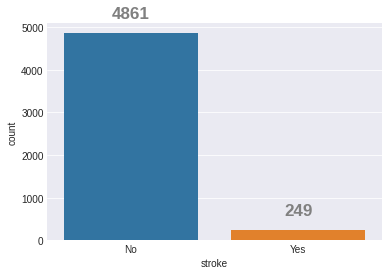

In [24]:
ax = sns.countplot(x = dtc['stroke'])
xlabels = ['No', 'Yes']
plt.xticks(np.arange(2), xlabels)

# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 17,
        xytext = (0, 15), 
        textcoords = 'offset points',
        color = 'grey'
    )

plt.show()

**Untuk kolom bertipe data numeric**

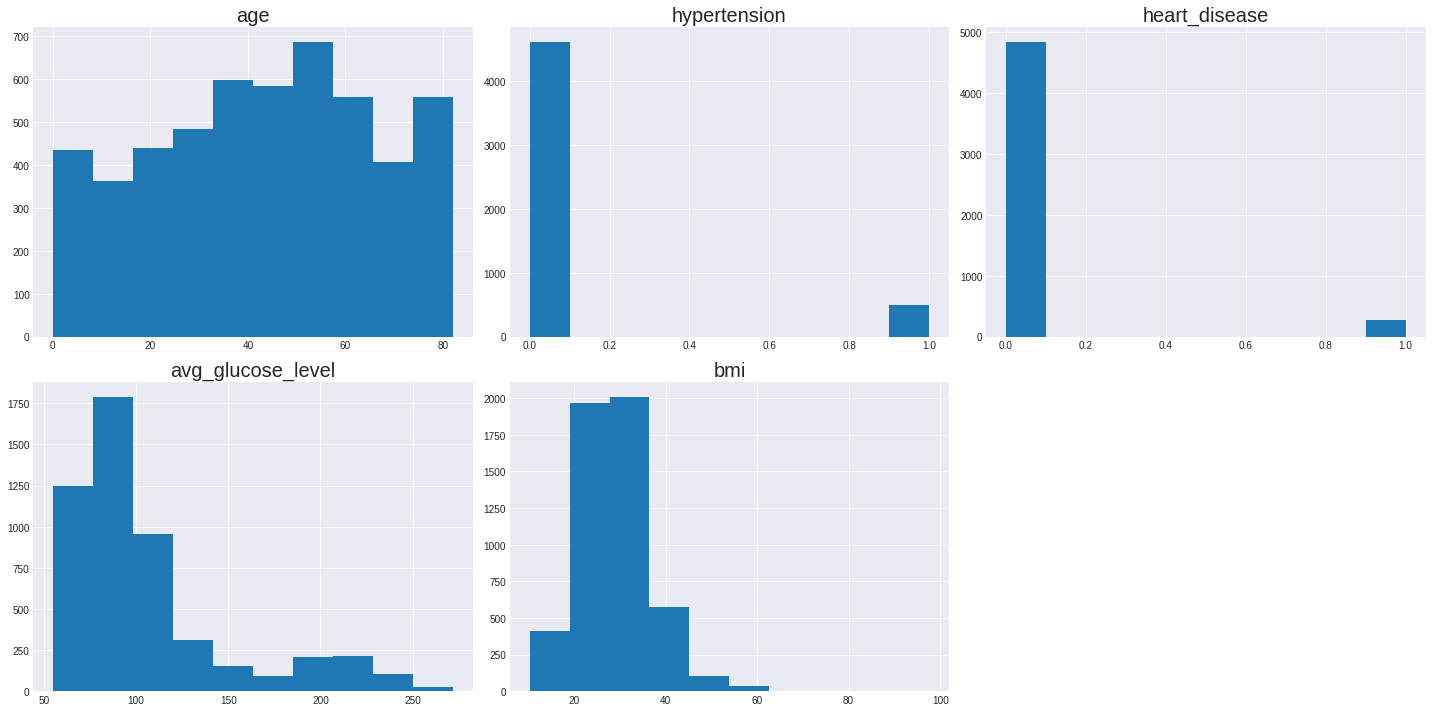

In [25]:
# plot all numerical features
plt.figure(figsize = (20, 10))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    plt.hist(dtc[num_cols[i]])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

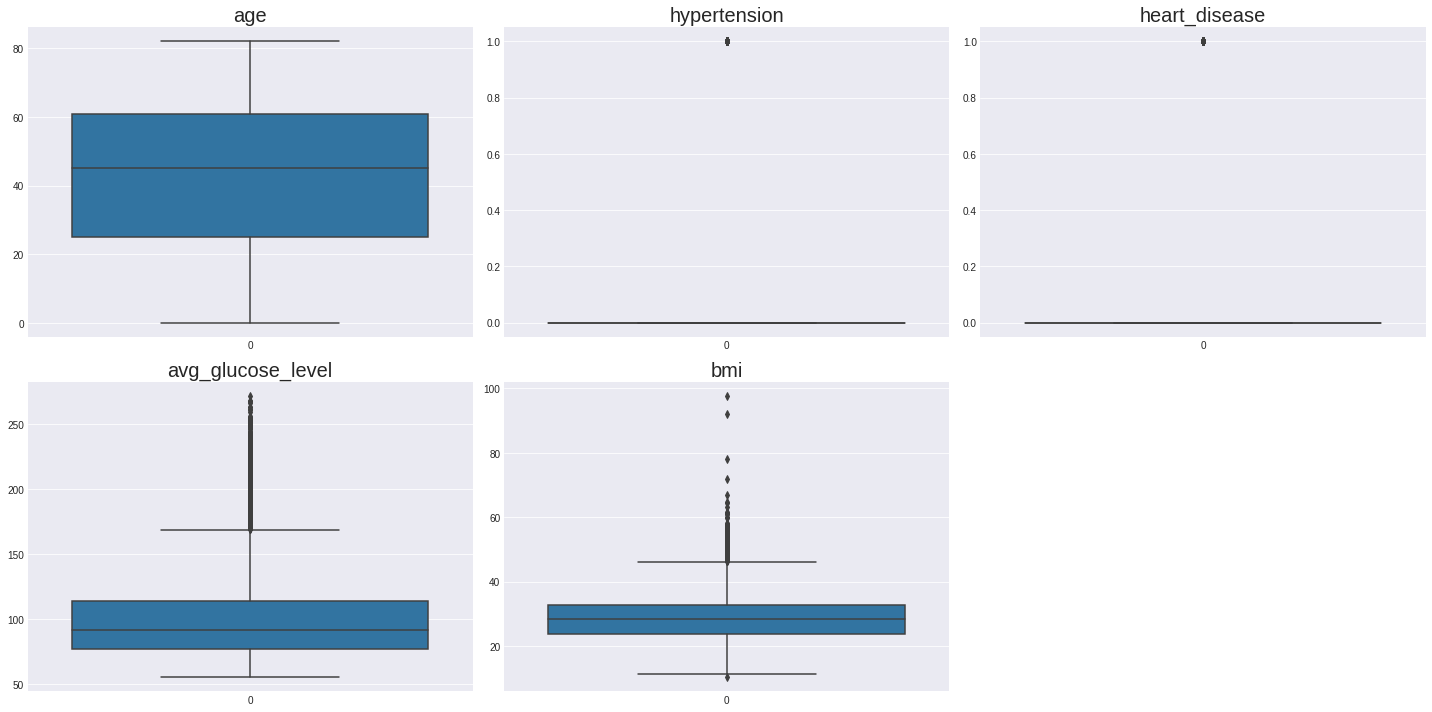

In [26]:
# plot all numerical features
plt.figure(figsize = (20, 10))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    sns.boxplot(data = dtc[num_cols[i]])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

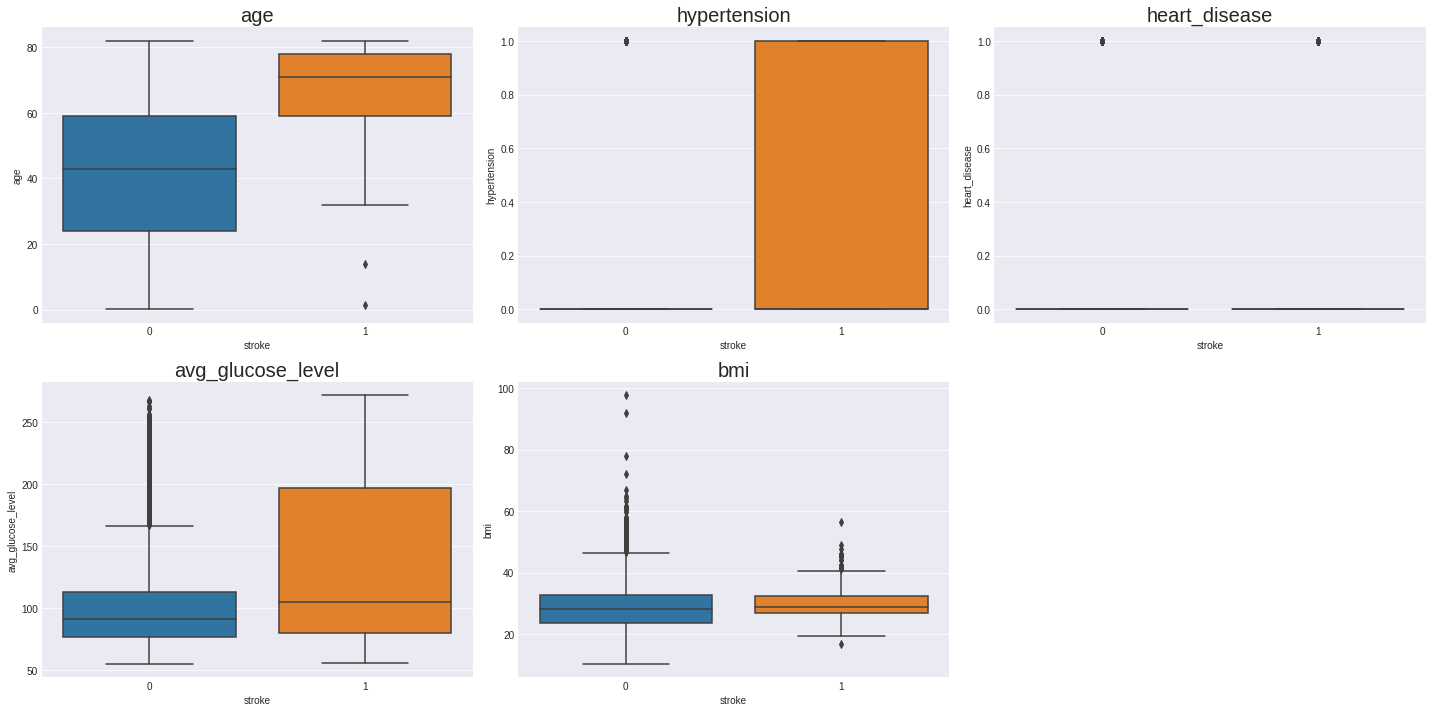

In [27]:
# plot all numerical features
plt.figure(figsize = (20, 10))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    sns.boxplot(y = dtc[num_cols[i]], x = dtc['stroke'])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

**Untuk kolom bertipe data object / kategori**

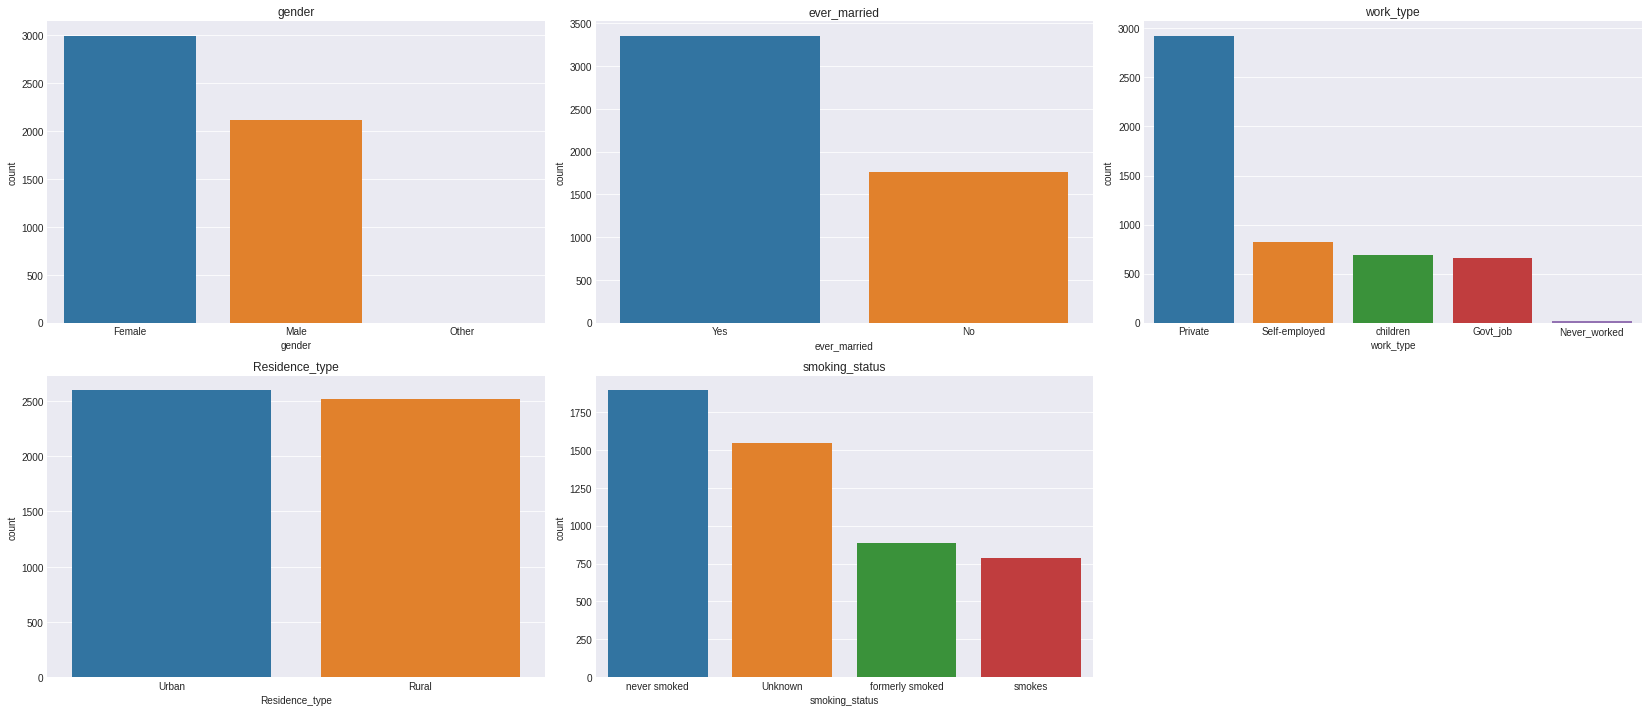

In [28]:
# plot all categorical features
plt.figure(figsize = (23, 10))
for i in range(len(ob_cols)):
    plt.subplot(len(ob_cols)//3+1, 3, i + 1)
    sns.countplot(
        x = dtc[ob_cols[i]],
        # order by frequency
        order = dtc[ob_cols[i]].value_counts().sort_values(ascending = False).index
    )
    plt.title(ob_cols[i], fontweight = 20)
plt.tight_layout()
plt.show()

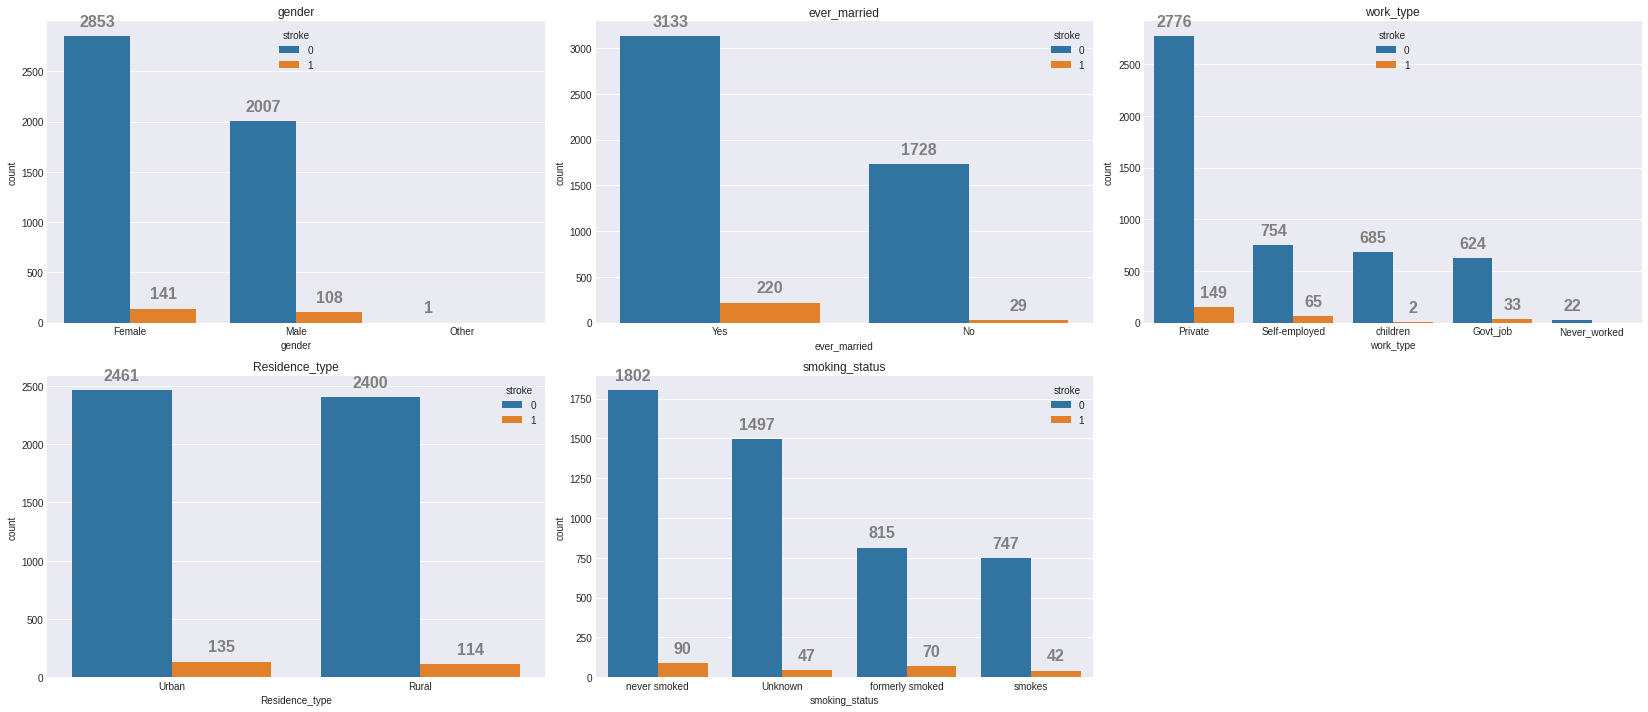

In [29]:

# plot all categorical features
plt.figure(figsize = (23, 10))
for i in range(len(ob_cols)):
    plt.subplot(len(ob_cols)//3+1, 3, i + 1)
    ax = sns.countplot(
        x = dtc[ob_cols[i]],
        hue = dtc['stroke'],
        # order by frequency
        order = dtc[ob_cols[i]].value_counts().sort_values(ascending = False).index
    )
    plt.title(ob_cols[i], fontweight = 20)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 10), 
            textcoords = 'offset points',
            color = 'grey'
        )
plt.tight_layout()
plt.show()

**Check korelasi data**

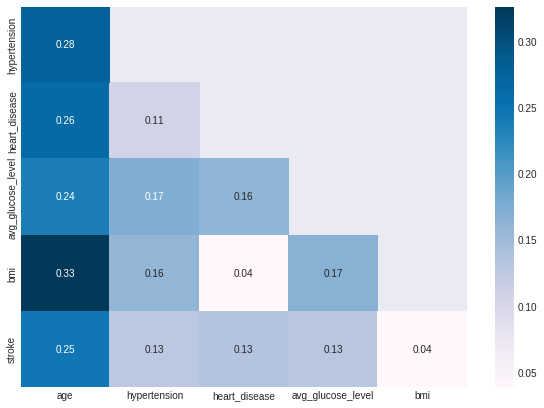

In [30]:
corr_ = dtc[num_cols + ['stroke']].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(columns = ['stroke'], index = ['age'])

plt.figure(figsize = (10, 7))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.2f',
    cmap = 'PuBu'
)
plt.show()

## **STEP 8 : DATA PREPROCESSING**

In [31]:
dtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Categorical Feature Encoding**

In [32]:
dtc[ob_cols].columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [33]:
gender_dummies = pd.get_dummies(dtc['gender'], prefix = 'gender')
dtc = pd.concat([dtc, gender_dummies], axis = 1)

In [34]:
dtc.loc[:, dtc.columns.str.contains('gender')]

,gender,gender_Female,gender_Male,gender_Other
0,Male,0,1,0
1,Female,1,0,0
2,Male,0,1,0
3,Female,1,0,0
4,Female,1,0,0
...,...,...,...,...
5105,Female,1,0,0
5106,Female,1,0,0
5107,Female,1,0,0
5108,Male,0,1,0


In [35]:
ever_married_dummies = pd.get_dummies(dtc['ever_married'], prefix = 'ever_married')
dtc = pd.concat([dtc, ever_married_dummies], axis = 1)

In [36]:
dtc.loc[:, dtc.columns.str.contains('ever_married')]

,ever_married,ever_married_No,ever_married_Yes
0,Yes,0,1
1,Yes,0,1
2,Yes,0,1
3,Yes,0,1
4,Yes,0,1
...,...,...,...
5105,Yes,0,1
5106,Yes,0,1
5107,Yes,0,1
5108,Yes,0,1


In [37]:
work_type_dummies = pd.get_dummies(dtc['work_type'], prefix = 'work_type')
dtc = pd.concat([dtc, work_type_dummies], axis = 1)

In [38]:
dtc.loc[:, dtc.columns.str.contains('work_type')]

,work_type,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,Private,0,0,1,0,0
1,Self-employed,0,0,0,1,0
2,Private,0,0,1,0,0
3,Private,0,0,1,0,0
4,Self-employed,0,0,0,1,0
...,...,...,...,...,...,...
5105,Private,0,0,1,0,0
5106,Self-employed,0,0,0,1,0
5107,Self-employed,0,0,0,1,0
5108,Private,0,0,1,0,0


In [39]:
residence_type_dummies = pd.get_dummies(dtc['Residence_type'], prefix = 'residence_type')
dtc = pd.concat([dtc, residence_type_dummies], axis = 1)

In [40]:
dtc.loc[:, dtc.columns.str.contains('residence_type')]

,residence_type_Rural,residence_type_Urban
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
5105,0,1
5106,0,1
5107,1,0
5108,1,0


In [41]:
smoking_status_dummies = pd.get_dummies(dtc['smoking_status'], prefix = 'smoking_status')
dtc = pd.concat([dtc, smoking_status_dummies], axis = 1)

In [42]:
dtc.loc[:, dtc.columns.str.contains('smoking_status')]

,smoking_status,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,formerly smoked,0,1,0,0
1,never smoked,0,0,1,0
2,never smoked,0,0,1,0
3,smokes,0,0,0,1
4,never smoked,0,0,1,0
...,...,...,...,...,...
5105,never smoked,0,0,1,0
5106,never smoked,0,0,1,0
5107,never smoked,0,0,1,0
5108,formerly smoked,0,1,0,0


In [43]:
dtc.drop(columns = ob_cols, inplace = True)

In [44]:
dtc.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.000000,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
6,53882,74.0,1,1,70.09,27.400000,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
7,10434,69.0,0,0,94.39,22.800000,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
8,27419,59.0,0,0,76.15,28.893237,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
9,60491,78.0,0,0,58.57,24.200000,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0


**Cek korelasi setelah dilakukan encoding**

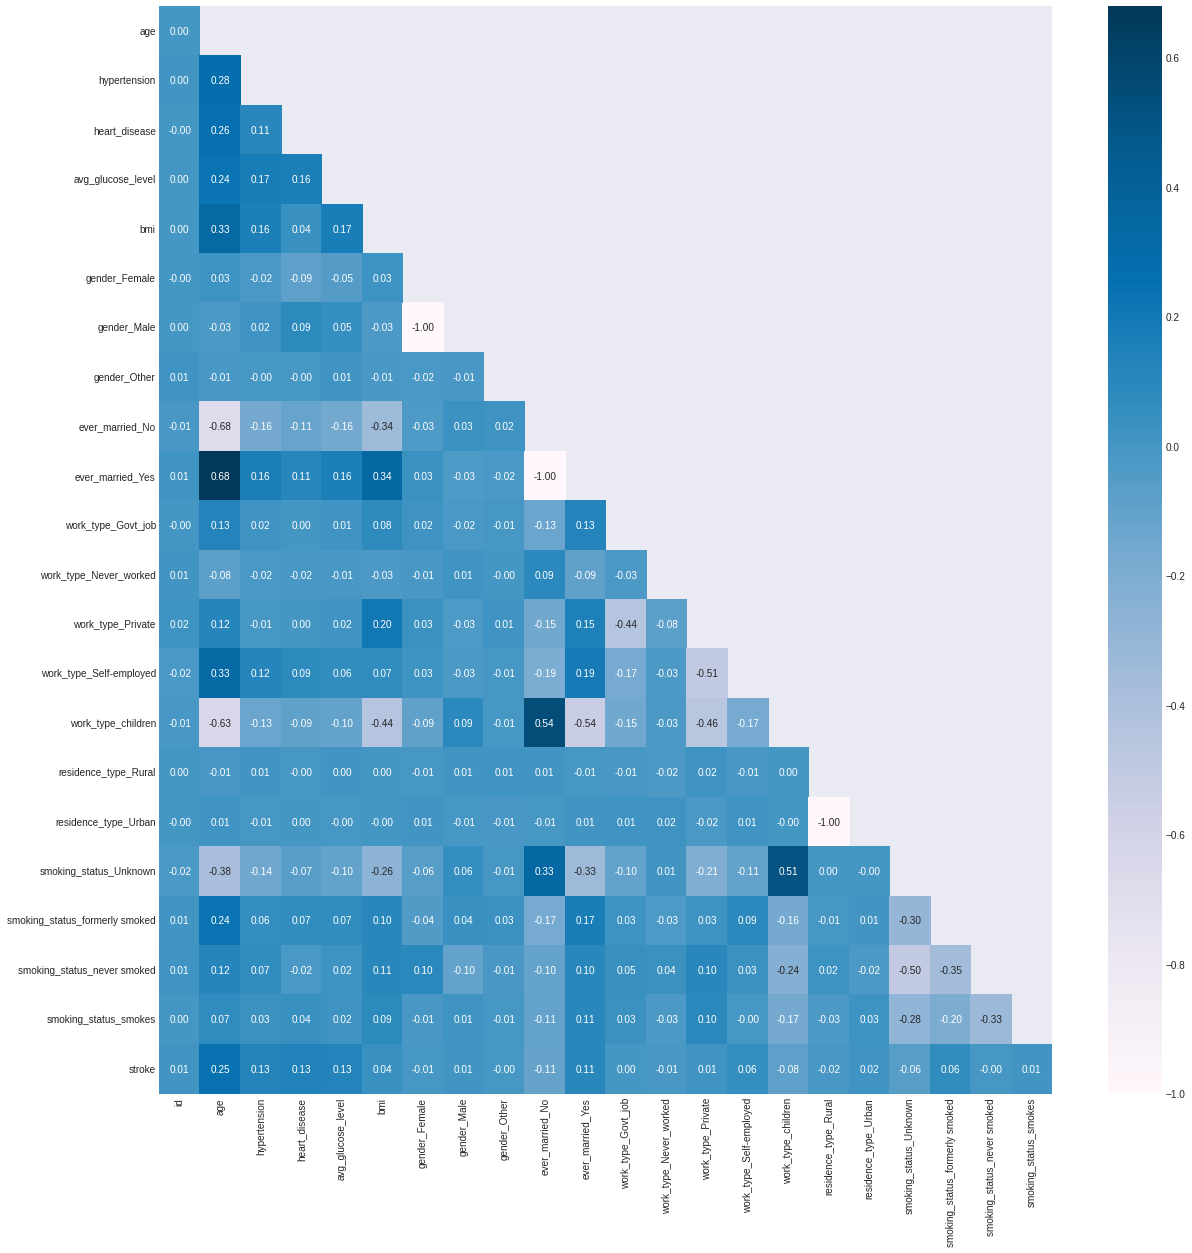

In [45]:
corr_ = dtc[list(dtc.drop(columns=["stroke"]).columns) + ["stroke"]].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(columns = ['stroke'], index = ['id'])

plt.figure(figsize = (20, 20))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.2f',
    cmap = 'PuBu'
)
plt.show()

**Mempersiapkan fitur dan target**

In [46]:
X = dtc.drop(columns = ['id', 'stroke'], axis = 1)
y = dtc['stroke']

**Split data**

**Split to train 70%, validation 20%, and test 10%.**

In [47]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3, random_state = 77, stratify = y)

In [48]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/3, random_state = 77, stratify = y_)

In [49]:
print(len(X_train)/len(X), len(X_val)/len(X), len(X_test)/len(X))

0.7 0.2 0.1


In [50]:
print(sum(y_train==1)/len(y_train), sum(y_val==1)/len(y_val), sum(y_test==1)/len(y_test))

0.048644115180318706 0.04892367906066536 0.04892367906066536


**Resampling Imbalanced Class**

In [51]:
smote = SMOTE(random_state=77, sampling_strategy="minority")

In [52]:
y_train.value_counts()

0    3403
1     174
Name: stroke, dtype: int64

In [53]:
X_res, y_res = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [54]:
y_res.ravel()

array([0, 0, 0, ..., 1, 1, 1])

##**STEP 9 : MODELING**

**Define Model**

In [55]:
logreg_model1 = LogisticRegression(random_state = 77, solver = 'liblinear')
logreg_model2 = LogisticRegression(random_state = 77, solver = 'liblinear')
logreg_model3 = LogisticRegression(random_state = 77, solver = 'liblinear', class_weight = dict({0: 0.1, 1:0.9}))

**Fit Training Data**

In [56]:
print(logreg_model1.fit(X_train, y_train))
print(logreg_model2.fit(X_res, y_res))
print(logreg_model3.fit(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=77, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=77, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=77, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [57]:
y_pred1 = logreg_model1.predict(X_train)
y_pred2 = logreg_model2.predict(X_res)
y_pred3 = logreg_model3.predict(X_train)

**Training Evaluation**

In [58]:
cm_train_1 = confusion_matrix(y_train, y_pred1)
cm_train_2 = confusion_matrix(y_res, y_pred2)
cm_train_3 = confusion_matrix(y_train, y_pred3)
cr_train_1 = classification_report(y_train, y_pred1)
cr_train_2 = classification_report(y_res, y_pred2)
cr_train_3 = classification_report(y_train, y_pred3)
roc_train_1 = roc_auc_score(y_train, y_pred1)
roc_train_2 = roc_auc_score(y_res, y_pred2)
roc_train_3 = roc_auc_score(y_train, y_pred3)

print("Confusion Matrix: without handling imbalanced class\n", cm_train_1)
print("\nConfusion Matrix: imbalanced class was handled using SMOTE resampling\n", cm_train_2)
print("\nConfusion Matrix: increase class_weight for minority class (stroke = 1)\n", cm_train_3)

print("Classification Report: without handling imbalanced class\n", cr_train_1)
print("\nClassification Report: imbalanced class was handled using SMOTE resampling\n", cr_train_2)
print("\nClassification Report: increase class_weight for minority class (stroke = 1)\n", cr_train_3)

print("ROC-AUC: without handling imbalanced class\n", roc_train_1)
print("\nROC-AUC: imbalanced class was handled using SMOTE resampling\n", roc_train_2)
print("\nROC-AUC: increase class_weight for minority class (stroke = 1)\n", roc_train_3)

Confusion Matrix: without handling imbalanced class
 [[3402    1]
 [ 172    2]]

Confusion Matrix: imbalanced class was handled using SMOTE resampling
 [[2564  839]
 [ 604 2799]]

Confusion Matrix: increase class_weight for minority class (stroke = 1)
 [[2918  485]
 [  60  114]]
Classification Report: without handling imbalanced class
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3403
           1       0.67      0.01      0.02       174

    accuracy                           0.95      3577
   macro avg       0.81      0.51      0.50      3577
weighted avg       0.94      0.95      0.93      3577


Classification Report: imbalanced class was handled using SMOTE resampling
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      3403
           1       0.77      0.82      0.80      3403

    accuracy                           0.79      6806
   macro avg       0.79      0.79      0

In [59]:
# get decision function scores:
y_scores1 = logreg_model1.decision_function(X_train)
y_scores2 = logreg_model2.decision_function(X_res)
y_scores3 = logreg_model3.decision_function(X_train)

In [60]:
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_scores1)
fpr2, tpr2, thresholds2 = roc_curve(y_res, y_scores2)
fpr3, tpr3, thresholds3 = roc_curve(y_train, y_scores3)

In [61]:
def plot_roc_curve(fpr, tpr, label=None):
    '''
    ROC Curve plot with diagonal line
    '''
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

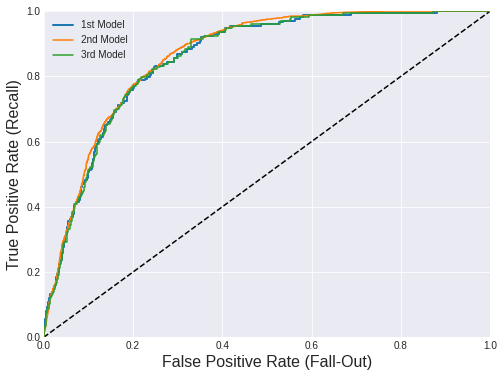

In [62]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr1, tpr1, label="1st Model")
plt.plot(fpr2, tpr2, label="2nd Model")
plt.plot(fpr3, tpr3, label="3rd Model")
plt.legend()
plt.show()

##**STEP 10 : VALIDATION**

In [63]:
pred_val1 = logreg_model1.predict(X_val)
pred_val2 = logreg_model2.predict(X_val)
pred_val3 = logreg_model3.predict(X_val)

In [64]:
y_val.value_counts()

0    972
1     50
Name: stroke, dtype: int64

**Evaluation**

In [65]:
cm_val_1 = confusion_matrix(y_val, pred_val1)
cm_val_2 = confusion_matrix(y_val, pred_val2)
cm_val_3 = confusion_matrix(y_val, pred_val3)
cr_val_1 = classification_report(y_val, pred_val1)
cr_val_2 = classification_report(y_val, pred_val2)
cr_val_3 = classification_report(y_val, pred_val3)
roc_val_1 = roc_auc_score(y_val, pred_val1)
roc_val_2 = roc_auc_score(y_val, pred_val2)
roc_val_3 = roc_auc_score(y_val, pred_val3)

print("Confusion Matrix: without handling imbalanced class\n", cm_val_1)
print("\nConfusion Matrix: imbalanced class was handled using SMOTE resampling\n", cm_val_2)
print("\nConfusion Matrix: increase class_weight for minority class (stroke = 1)\n", cm_val_3)

print("Classification Report: without handling imbalanced class\n", cr_val_1)
print("\nClassification Report: imbalanced class was handled using SMOTE resampling\n", cr_val_2)
print("\nClassification Report: increase class_weight for minority class (stroke = 1)\n", cr_val_3)

print("ROC-AUC Score: without handling imbalanced class\n", roc_val_1)
print("\nROC-AUC Score: imbalanced class was handled using SMOTE resampling\n", roc_val_2)
print("\nROC-AUC Score: increase class_weight for minority class (stroke = 1)\n", roc_val_3)

Confusion Matrix: without handling imbalanced class
 [[972   0]
 [ 50   0]]

Confusion Matrix: imbalanced class was handled using SMOTE resampling
 [[732 240]
 [ 15  35]]

Confusion Matrix: increase class_weight for minority class (stroke = 1)
 [[833 139]
 [ 22  28]]
Classification Report: without handling imbalanced class
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022


Classification Report: imbalanced class was handled using SMOTE resampling
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.13      0.70      0.22        50

    accuracy                           0.75      1022
   macro avg       0.55      0.73      0.53      102

In [66]:
# get decision function scores:
y_scores_val1 = logreg_model1.decision_function(X_val)
y_scores_val2 = logreg_model2.decision_function(X_val)
y_scores_val3 = logreg_model3.decision_function(X_val)

In [67]:
fpr_v1, tpr_v1, thresholds_v1 = roc_curve(y_val, y_scores_val1)
fpr_v2, tpr_v2, thresholds_v2 = roc_curve(y_val, y_scores_val2)
fpr_v3, tpr_v3, thresholds_v3 = roc_curve(y_val, y_scores_val3)

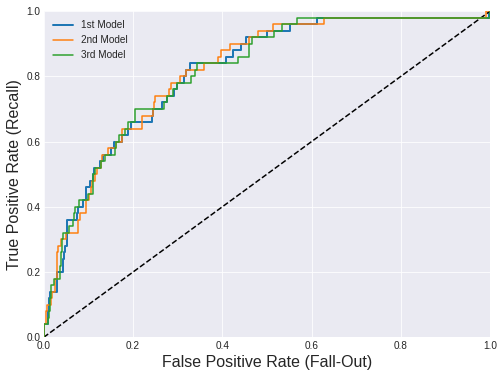

In [68]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_v1, tpr_v1, label="1st Model")
plt.plot(fpr_v2, tpr_v2, label="2nd Model")
plt.plot(fpr_v3, tpr_v3, label="3rd Model")
plt.legend()
plt.show()

##**STEP 11 : MODEL INFERENCE**

In [69]:
pred_test1 = logreg_model1.predict(X_test)
pred_test2 = logreg_model2.predict(X_test)
pred_test3 = logreg_model3.predict(X_test)

In [70]:
y_test.value_counts()

0    486
1     25
Name: stroke, dtype: int64

**Evaluation**

In [71]:
cm_test_1 = confusion_matrix(y_test, pred_test1)
cm_test_2 = confusion_matrix(y_test, pred_test2)
cm_test_3 = confusion_matrix(y_test, pred_test3)
cr_test_1 = classification_report(y_test, pred_test1)
cr_test_2 = classification_report(y_test, pred_test2)
cr_test_3 = classification_report(y_test, pred_test3)
roc_test_1 = roc_auc_score(y_test, pred_test1)
roc_test_2 = roc_auc_score(y_test, pred_test2)
roc_test_3 = roc_auc_score(y_test, pred_test3)

print("Confusion Matrix: without handling imbalanced class\n", cm_test_1)
print("\nConfusion Matrix: imbalanced class was handled using SMOTE resampling\n", cm_test_2)
print("\nConfusion Matrix: increase class_weight for minority class (stroke = 1)\n", cm_test_3)

print("Classification Report: without handling imbalanced class\n", cr_test_1)
print("\nClassification Report: imbalanced class was handled using SMOTE resampling\n", cr_test_2)
print("\nClassification Report: increase class_weight for minority class (stroke = 1)\n", cr_test_3)

print("ROC-AUC Score: without handling imbalanced class\n", roc_test_1)
print("\nROC-AUC Score: imbalanced class was handled using SMOTE resampling\n", roc_test_2)
print("\nROC-AUC Score: increase class_weight for minority class (stroke = 1)\n", roc_test_3)

Confusion Matrix: without handling imbalanced class
 [[486   0]
 [ 25   0]]

Confusion Matrix: imbalanced class was handled using SMOTE resampling
 [[364 122]
 [  8  17]]

Confusion Matrix: increase class_weight for minority class (stroke = 1)
 [[424  62]
 [ 11  14]]
Classification Report: without handling imbalanced class
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       486
           1       0.00      0.00      0.00        25

    accuracy                           0.95       511
   macro avg       0.48      0.50      0.49       511
weighted avg       0.90      0.95      0.93       511


Classification Report: imbalanced class was handled using SMOTE resampling
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       486
           1       0.12      0.68      0.21        25

    accuracy                           0.75       511
   macro avg       0.55      0.71      0.53       51

In [72]:
# get decision function scores:
y_scores_test1 = logreg_model1.decision_function(X_test)
y_scores_test2 = logreg_model2.decision_function(X_test)
y_scores_test3 = logreg_model3.decision_function(X_test)

In [73]:
fpr_t1, tpr_t1, thresholds_t1 = roc_curve(y_test, y_scores_test1)
fpr_t2, tpr_t2, thresholds_t2 = roc_curve(y_test, y_scores_test2)
fpr_t3, tpr_t3, thresholds_t3 = roc_curve(y_test, y_scores_test3)

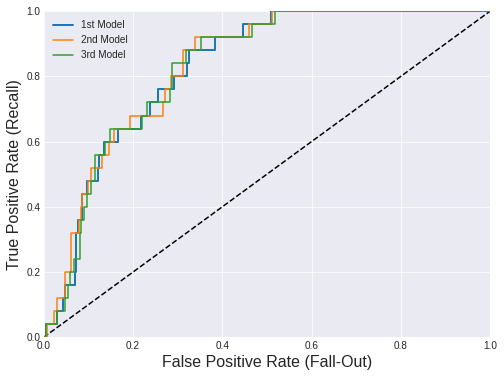

In [74]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_t1, tpr_t1, label="1st Model")
plt.plot(fpr_t2, tpr_t2, label="2nd Model")
plt.plot(fpr_t3, tpr_t3, label="3rd Model")
plt.legend()
plt.show()

##**STEP 12 : KESIMPULAN**

* Model Regresi Logistik dengan pra-pemrosesan data sederhana tidak bekerja dengan dataset ini karena memiliki kelas yang sangat tidak seimbang. Kinerja model untuk kelas minoritas (stroke = 1) benar-benar buruk.

* Menurut hasil ini, solusi untuk meningkatkan kinerja model adalah dengan memiliki lebih banyak data untuk kelas minoritas, atau menekankan pada model bahwa kelas minoritas adalah kelas paling penting yang perlu kita prediksi.